# Bases de statistiques

## Mesures de la centralité

1 - La moyenne

La moyenne est la mesure de centralité la plus utilisée. Elle se calcule en divisant la somme des valeurs par le nombre des valeurs :

$$\mu= \frac{1}{n}\sum_{i=0}^n x_i$$


In [45]:
import numpy as np
import pandas as pd

np.random.seed(42)
data_arr = np.random.randint(0, 21, size=(100))
data_df = pd.DataFrame(data_arr)
data_arr, data_df

(array([ 6, 19, 14, 10,  7, 20,  6, 18, 10, 10, 20,  3,  7,  2, 20,  1, 11,
         5,  1, 20,  0, 11, 11, 16,  9, 15, 14, 14, 18, 11, 19,  2,  4, 18,
         6, 20,  8,  6, 17,  3, 13, 17,  8, 20,  1, 19, 14,  6, 11,  7, 14,
         2, 13, 16,  3, 17,  7,  3,  1,  5,  9,  3, 17, 11,  1,  9,  3, 13,
        15, 14,  7, 13,  7, 20, 15, 12, 17, 14, 20, 12,  8, 14, 12,  0,  6,
         8,  0, 11,  7, 10, 18, 16,  7,  2,  2,  0,  4,  9,  6,  8]),
      0
 0    6
 1   19
 2   14
 3   10
 4    7
 ..  ..
 95   0
 96   4
 97   9
 98   6
 99   8
 
 [100 rows x 1 columns])

**Activité :**

- Calculer la moyenne de data_arr sans librairie externe

- Calculer la moyenne de data_arr avec numpy et pandas

In [6]:
# Calcul de la moyenne sans librairie externe
data_sum = 0
tot = 0
for val in data_arr:
    data_sum += val
    tot += 1
mean = data_sum / tot
print(mean)

10.09


In [4]:
# Calcul de la moyenne avec numpy et avec pandas
data_arr.mean(), data_df.mean()[0]

(10.09, 10.09)

2 - La médiane

La médiane correspond à la valeur qui se situe au milieu lorsque les données sont triées. Cette mesure est moins sensible aux valeurs aberrantes que la moyenne. Elle se calcule différemment si le nombre de valeurs est pair ou impair :

$$n\ est\ impair:\ \ x_{mediane}=x_{\frac{n-1}{2}}$$

$$n\ est\ pair:\ \ x_{mediane}=\frac{x_\frac{n-2}{2}+x_\frac{n}{2}}{2}$$

![mediane](https://math-coaching.com/img/fiche/184/mediane-valeur-centrale-serie-statistique-A.jpg)

**Activité :**

- Calculer la médiane de data_arr sans librairie externe

- Calculer la médiane de data_arr avec numpy et pandas

In [22]:
# Calcul de la médiane sans librairie externe
#np.random.shuffle(data_arr)
data_arr.sort()
n = len(data_arr)
if n % 2 == 0:
    m1 = data_arr[(n - 2) // 2]
    m2 = data_arr[(n // 2)]
    median = (m1 + m2) / 2.0
else:
    median = data_arr[(n - 2) // 2]

median

10.0

In [58]:
# Calcul de la médiane avec numpy et avec pandas
np.median(data_arr), data_df.median()

(8.0,
 0    8.0
 dtype: float64)

3 - Le mode

Le mode correspond à la ou les valeurs qui apparaissent le plus dans un jeu de données (variables quantitatives)

**Activité :**

- Calculer le mode de data_arr sans librairie externe

- Calculer le mode de data_arr avec numpy et pandas

In [52]:
# Calcul du mode sans librairie externe
from collections import Counter, defaultdict
counter = Counter(data_arr)
for val, nb in counter.most_common():
    if nb == counter.most_common(1)[0][1]:
        print(val, nb)
    else:
        break
d = defaultdict(int)
for data in data_arr:
    d[data] += 1
print(d)

14 8
7 8
20 8
defaultdict(<class 'int'>, {6: 7, 19: 3, 14: 8, 10: 4, 7: 8, 20: 8, 18: 4, 3: 6, 2: 5, 1: 5, 11: 7, 5: 2, 0: 4, 16: 3, 9: 4, 15: 3, 4: 2, 8: 5, 17: 5, 13: 4, 12: 3})


In [18]:
# Calcul du mode avec numpy et avec pandas
from scipy import stats
mode = stats.mode(data_arr)
mode, data_df.mode()

(ModeResult(mode=array([7]), count=array([8])),
     0
 0   7
 1  14
 2  20)

In [17]:
data_df.mode().loc[0].loc[0], data_df.median()[0], data_df.mean()[0]

(7, 10.0, 10.09)

**Activité :**

- Tracer un histogramme des données de data_arr

- Afficher sur le graphique le mode, la médiane et la moyenne

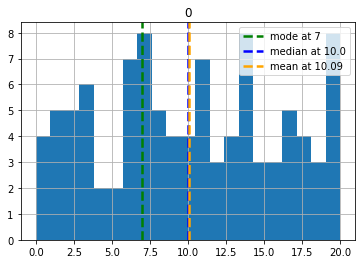

In [7]:
# Analyse graphique
import matplotlib.pyplot as plt
data_df.hist(bins=21)
measurements = [data_df.mode().loc[0].loc[0], data_df.median()[0], data_df.mean()[0]]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()
plt.show()

In [58]:
data_df.value_counts().sort_index()

0     4
1     5
2     5
3     6
4     2
5     2
6     7
7     8
8     5
9     4
10    4
11    7
12    3
13    4
14    8
15    3
16    3
17    5
18    4
19    3
20    8
dtype: int64

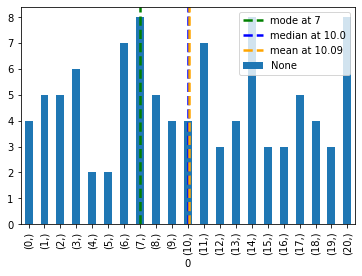

In [59]:
data_df.value_counts().sort_index().plot.bar()
measurements = [data_df.mode().loc[0].loc[0], data_df.median()[0], data_df.mean()[0]]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()
plt.show()

![mode_mdeian](https://www.suezwaterhandbook.fr/var/degremont/storage/images/formules-et-outils/formulaire/mathematiques/statistiques/12430-3-fre-FR/statistiques.png)

## Mesures de la dispersion

1 - La variance

La variance correspond à la moyenne des écarts à la moyenne. Cela permet de mesurer la dispersion des données. Pour l'ensemble des données :

$$variance:\ \sigma^2=\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2$$

Pour un échantillon :

$$variance\ échantillon:\ s^2=\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2$$

In [79]:
data_arr, data_df

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,
         8,  8,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12,
        12, 12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 15, 16, 16, 16, 16, 16,
        16, 16, 16, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20]),
      0
 0    0
 1    0
 2    0
 3    0
 4    0
 ..  ..
 95  19
 96  19
 97  19
 98  20
 99  20
 
 [100 rows x 1 columns])

**Activité :**

- Calculer la variance (de la population et de l'échantillon) de data_arr sans librairie externe

- Calculer la variance (de la population et de l'échantillon) de data_arr avec numpy et pandas

In [83]:
# Calcul de la variance sans librairie externe
n = len(data_arr)
mean = data_arr.mean()
squared_deviations = 0
for v in data_arr:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / (n-1)
population_variance

37.18494949494945

In [85]:
# Calcul de la variance avec numpy et avec pandas
data_arr.var(ddof=1), data_df.var(ddof=1)

(37.18494949494949,
 0    37.184949
 dtype: float64)

2 - Ecart-type (standard deviation)

Il s'agit de la racine carré de la variance (comparable à la donnée d'entrée)

$$écart\ type:\ \sigma=\sqrt{\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2}\ \ =\ \ \sqrt{\sigma^2}$$

$$écart\ type\ échantillon:\ s=\sqrt{\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2}\ \ =\ \ \sqrt{s^2}$$

**Activité :**

- Calculer l'écart-type (de la population et de l'échantillon) de data_arr sans librairie externe

- Calculer l'écart-type (de la population et de l'échantillon) de data_arr avec numpy et pandas

In [88]:
# Calcul de l'écart-type sans librairie externe
import math
n = len(data_arr)
mean = data_arr.mean()
squared_deviations = 0
for v in data_arr:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / (n-1)
math.sqrt(population_variance), population_variance**(1/2)

(6.09794633421363, 6.09794633421363)

In [90]:
# Calcul de l'écart-type avec numpy et avec pandas
data_arr.std(ddof=1), data_df.std()

(6.097946334213634,
 0    6.097946
 dtype: float64)

3 - Quantiles

Les quantiles sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données (https://fr.wikipedia.org/wiki/Quantile)

**Activité :**

- Calculer le premier et le troisième quartile avec pandas

- Calculer le premier décile avec pandas

In [20]:
# Avec pandas
data_df.quantile(0.25), data_df.quantile(0.75), data_df.quantile(0.10)

(0    6.0
 Name: 0.25, dtype: float64,
 0    15.0
 Name: 0.75, dtype: float64,
 0    2.0
 Name: 0.1, dtype: float64)

**Activité :**

- Afficher les données à l'aide d'une boite à moustaches (box plot) : y a-t-il des données aberrantes

- Retrouver les valeurs des extrémités de la boite à moustache (https://seaborn.pydata.org/generated/seaborn.boxplot.html)

- Ajouter des données aberrantes dans le jeu de données

- Modifier la position des extrémités des boites à moustaches


<AxesSubplot:xlabel='0'>

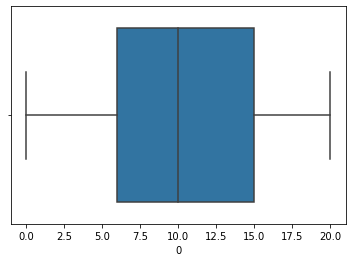

In [21]:
# Boites à moustaches / Box plot
import seaborn as sns
sns.boxplot(x=data_df[0])

<AxesSubplot:xlabel='0'>

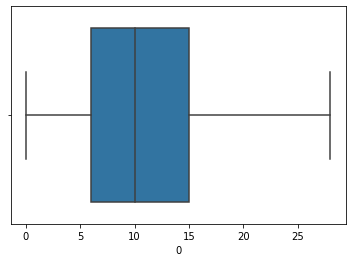

In [34]:
data_df_2 = data_df.copy()
data_df_2 = data_df_2.append([28])
sns.boxplot(x=data_df_2[0])

4 - Z-score

Il s'agit de la distance de chaque point du jeu de données à la moyenne calculée en nombre d'écart-types

**Activité :**

- Calculer le z-score pour toutes les données de data_df dans une nouvelle colonne du dataframe

In [60]:
data_df["zscore"] = (data_df - data_df.mean())/data_df.std(ddof=0)
data_df

,0,zscore
0,6,-0.676223
1,19,1.473142
2,14,0.646463
3,10,-0.014880
4,7,-0.510888
...,...,...
95,0,-1.668238
96,4,-1.006895
97,9,-0.180216
98,6,-0.676223


## Analyse globale

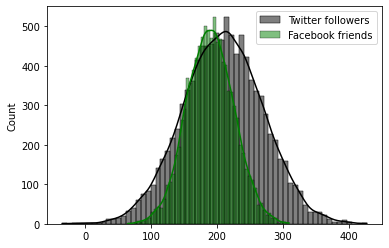

In [65]:
twitter_mu = 208.0
twitter_sigma = 60.0
twitter_followers = np.random.normal(twitter_mu, twitter_sigma, 10000)
facebook_mu = 190.0
facebook_sigma = 36.0
facebook_friends = np.random.normal(facebook_mu, facebook_sigma, 10000)
sns.histplot(twitter_followers, label='Twitter followers', color="black", kde=True)
sns.histplot(facebook_friends, label='Facebook friends', color="green", kde=True)
c=plt.legend()

**Activité :**

- Calculer le pourcentage de données comprise entre la moyenne + 1 écart-type et la moyenne - 1 écart-type

- Même question pour +/-2 et +/-3

In [72]:
twitter_df = pd.DataFrame(twitter_followers)
twitter_df["zscore"] = (twitter_df - twitter_df.mean())/twitter_df.std(ddof=0)
(twitter_df["zscore"].abs()<3).sum()/twitter_df["zscore"].count()

0.9973